In [ ]:
#!cd /content/drive/MyDrive/自分用; python main.py

for i in range(0,1):
  print(i)

0


In [ ]:
############################一度実行したら実行しない！#############################

# パッケージのimport
import glob
import os.path as osp
import random
import numpy as np
import json

from PIL import Image
from tqdm import tqdm
import matplotlib.pyplot as plt
#%matplotlib inline

import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import torchvision
from torchvision import models, transforms
'''

#画像の大きさを正方形で揃える。今回は(512,512)で合わせた。

from PIL import Image

def crop_center(pil_img, crop_width, crop_height):
    img_width, img_height = pil_img.size
    return pil_img.crop(((img_width - crop_width) // 2,
                         (img_height - crop_height) // 2,
                         (img_width + crop_width) // 2,
                         (img_height + crop_height) // 2))

def crop_max_square(pil_img):
    return crop_center(pil_img, min(pil_img.size), min(pil_img.size))

#path_listを作る
def make_datapath_list():

  train_img_list = list()

  for img_idx in range(0,307):
    img_path = '/content/drive/MyDrive/自分用/ppkt/content2/shiba/{}.jpg'.format(img_idx)
    train_img_list.append(img_path)
  
  return train_img_list

def make_resized_datapath_list():

  train_img_list = list()

  for img_idx in range(0,308):
    img_path = '/content/drive/MyDrive/自分用/ppkt/content2/shiba/{}_resized2.jpg'.format(img_idx)
    train_img_list.append(img_path)
  
  return train_img_list

train_img_list = make_resized_datapath_list()

#画像をresizeする


for idx in range(1,len(train_img_list)):
  im = Image.open('/content/drive/MyDrive/自分用/ppkt/content2/shiba/{}.jpg'.format(idx))
  im = im.convert('RGB')

  im_new = crop_max_square(im)
  im_new.save('/content/drive/MyDrive/自分用/ppkt/content2/shiba/{}_croped.jpg'.format(idx), quality=95)

  im_resize = im_new.resize((64,64))
  im_resize.save('/content/drive/MyDrive/自分用/ppkt/content2/shiba/{}_resized2.jpg'.format(idx), quality=95)
'''

"\n\n#画像の大きさを正方形で揃える。今回は(512,512)で合わせた。\n\nfrom PIL import Image\n\ndef crop_center(pil_img, crop_width, crop_height):\n    img_width, img_height = pil_img.size\n    return pil_img.crop(((img_width - crop_width) // 2,\n                         (img_height - crop_height) // 2,\n                         (img_width + crop_width) // 2,\n                         (img_height + crop_height) // 2))\n\ndef crop_max_square(pil_img):\n    return crop_center(pil_img, min(pil_img.size), min(pil_img.size))\n\n#path_listを作る\ndef make_datapath_list():\n\n  train_img_list = list()\n\n  for img_idx in range(0,307):\n    img_path = '/content/drive/MyDrive/自分用/ppkt/content2/shiba/{}.jpg'.format(img_idx)\n    train_img_list.append(img_path)\n  \n  return train_img_list\n\ndef make_resized_datapath_list():\n\n  train_img_list = list()\n\n  for img_idx in range(0,308):\n    img_path = '/content/drive/MyDrive/自分用/ppkt/content2/shiba/{}_resized2.jpg'.format(img_idx)\n    train_img_list.append(img_path)\n  \n  

In [ ]:
#Augumentation

In [ ]:
def make_resized_datapath_list():

  train_img_list = list()

  for img_idx in range(0,308):
    img_path = '/content/drive/MyDrive/自分用/ppkt/content2/shiba/{}_resized2.jpg'.format(img_idx)
    train_img_list.append(img_path)
  
  return train_img_list

#Transfomer

class ImageTransform():

  def __init__(self, mean, std):
    self.data_transform = transforms.Compose([
                                              transforms.ToTensor(),
                                              transforms.Normalize(mean,std)
    ])

  def __call__(self, img):
    return self.data_transform(img)

#Dataset
#transformにある操作をなされた画像が出てくる(大体正規化されたtensor)

class GAN_Img_Dataset(data.Dataset):

  def __init__(self, file_list, transform):
    self.file_list = file_list
    self.transform = transform

  def __len__(self):
    return len(self.file_list)

  def __getitem__(self, index):
    img_path = self.file_list[index]
    img = Image.open(img_path)
    img_transformed = self.transform(img)
    return img_transformed


# 乱数のシードを設定
torch.manual_seed(1234)
np.random.seed(1234)
random.seed(1234)



#resizedファイルを格納したリストを作る

train_img_list_resized = make_resized_datapath_list()

print(len(train_img_list_resized))
train_img_list_resized[9]
  

#Dataloaderの作成

mean=(0.5,)
std=(0.5,)

#file_list(pathのリスト)を処理したものができる
train_dataset = GAN_Img_Dataset(train_img_list_resized, transform=ImageTransform(mean,std))

batch_size = 10

train_dataloader = torch.utils.data.DataLoader(
    train_dataset, batch_size=batch_size, shuffle=True
)

308


In [ ]:
make_resized_datapath_list()[0:10]

['/content/drive/MyDrive/自分用/ppkt/content2/shiba/0_resized2.jpg',
 '/content/drive/MyDrive/自分用/ppkt/content2/shiba/1_resized2.jpg',
 '/content/drive/MyDrive/自分用/ppkt/content2/shiba/2_resized2.jpg',
 '/content/drive/MyDrive/自分用/ppkt/content2/shiba/3_resized2.jpg',
 '/content/drive/MyDrive/自分用/ppkt/content2/shiba/4_resized2.jpg',
 '/content/drive/MyDrive/自分用/ppkt/content2/shiba/5_resized2.jpg',
 '/content/drive/MyDrive/自分用/ppkt/content2/shiba/6_resized2.jpg',
 '/content/drive/MyDrive/自分用/ppkt/content2/shiba/7_resized2.jpg',
 '/content/drive/MyDrive/自分用/ppkt/content2/shiba/8_resized2.jpg',
 '/content/drive/MyDrive/自分用/ppkt/content2/shiba/9_resized2.jpg']

In [ ]:
#model

# パッケージのimport
import glob
import os.path as osp
import random
import numpy as np
import json
from PIL import Image
from tqdm import tqdm
import matplotlib.pyplot as plt
#%matplotlib inline

import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import torchvision
from torchvision import models, transforms

class Generator(nn.Module):

  def __init__(self, z_dim=20, image_size=64):
    super(Generator, self).__init__()

    self.layer1 = nn.Sequential(
        nn.ConvTranspose2d(z_dim, image_size * 16, kernel_size=4, stride=1, padding=1),
        nn.BatchNorm2d(image_size * 16),
        nn.ReLU(inplace=True)
        )

    self.layer2 = nn.Sequential(
        nn.ConvTranspose2d(image_size * 16, image_size * 8, kernel_size=4, stride=2, padding=1),
        nn.BatchNorm2d(image_size * 8),
        nn.ReLU(inplace=True)
        )
    
    self.layer3 = nn.Sequential(
        nn.ConvTranspose2d(image_size * 8, image_size *4, kernel_size=4, stride=2, padding=1),
        nn.BatchNorm2d(image_size * 4),
        nn.ReLU(inplace=True)
        )
    
    self.layer4 = nn.Sequential(
        nn.ConvTranspose2d(image_size * 4, image_size *2, kernel_size=4, stride=2, padding=1),
        nn.BatchNorm2d(image_size * 2),
        nn.ReLU(inplace=True)
        )
    
    self.layer5 = nn.Sequential(
        nn.ConvTranspose2d(image_size * 2, image_size, kernel_size=4, stride=2, padding=1),
        nn.BatchNorm2d(image_size),
        nn.ReLU(inplace=True)
        )
    
    self.last = nn.Sequential(
        nn.ConvTranspose2d(image_size, 3, kernel_size=4, stride=2, padding=1),
        nn.Tanh()
        )

  def forward(self, z):
    out = self.layer1(z)
    out = self.layer2(out)
    out = self.layer3(out)
    out = self.layer4(out)
    out = self.layer5(out)
    out = self.last(out)

    return out #[3,64,64]

    

class Discriminator(nn.Module):

  def __init__(self, z_dim=20, image_size=64):
    super(Discriminator, self).__init__()
    
    self.layer1 = nn.Sequential(
        nn.Conv2d(3, image_size, kernel_size=4, stride=2, padding=1),
        nn.LeakyReLU(0.1, inplace=True)
    )

    self.layer2 = nn.Sequential(
        nn.Conv2d(image_size, image_size*2, kernel_size=4, stride=2, padding=1),
        nn.LeakyReLU(0.1, inplace=True)
    )

    self.layer3 = nn.Sequential(
        nn.Conv2d(image_size*2, image_size*4, kernel_size=4, stride=2, padding=1),
        nn.LeakyReLU(0.1, inplace=True)
    )

    self.layer4 = nn.Sequential(
        nn.Conv2d(image_size*4, image_size*8, kernel_size=4, stride=2, padding=1),
        nn.LeakyReLU(0.1, inplace=True)
    )

    self.dropout1 = torch.nn.Dropout2d(p=0.3)  # [new] Dropoutを追加してみる
    self.dropout2 = torch.nn.Dropout2d(p=0.3)
    self.dropout3 = torch.nn.Dropout2d(p=0.3)
    self.dropout4 = torch.nn.Dropout2d(p=0.3)
    self.dropout5 = torch.nn.Dropout2d(p=0.3)

    self.last = nn.Conv2d(image_size*8, 1, kernel_size=4, stride=1)

  def forward(self, x):
    
    out = self.dropout1(x)
    out = self.layer1(out)
    out = self.dropout2(out)
    out = self.layer2(out)
    out = self.dropout3(out)
    out = self.layer3(out)
    out = self.dropout4(out)
    out = self.layer4(out)
    out = self.dropout5(out)
    out = self.last(out)

    return out

    
#重みの初期化の設定
def weights_init(m):
  classname = m.__class__.__name__
  if classname.find('Conv') != -1:
    nn.init.normal_(m.weight.data, 0.0, 0.02)
    nn.init.constant_(m.bias.data, 0)

  elif classname.find('BatchNorm') != -1:
    nn.init.normal_(m.weight.data, 1.0, 0.02)
    nn.init.constant_(m.bias.data, 0)






Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([1, 20])
torch.Size([1, 20, 1, 1])
torch.Size([1, 3, 64, 64])


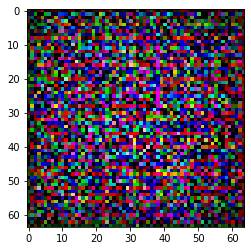

In [ ]:
#GeneratorとDescriminatorの挙動を確認
#(1,20,1,1)の次元を持つ乱数ベクトルをGeneratorに入れて出力させる（バッチ1。1枚だけの画像を出力。）
#Generatorが転置畳み込みして生成した画像をDescriminatorに判別させる

import matplotlib.pyplot as plt
%matplotlib inline
G = Generator(z_dim=20, image_size=64)

D = Discriminator(z_dim=20, image_size=64)

input_z = torch.randn(1,20)
print(input_z.shape)
input_z = input_z.view(input_z.size(0), input_z.size(1), 1, 1)
print(input_z.shape)
fake_images = G(input_z)
print(fake_images.shape)

img_transformed = fake_images[0].detach().numpy()
#白黒にする
plt.imshow(img_transformed.transpose(1,2,0))
plt.show()

In [ ]:
d_out = D(fake_images)

print(nn.Sigmoid()(d_out))

tensor([[[[0.5107]]]], grad_fn=<SigmoidBackward0>)


In [ ]:
#train func

# パッケージのimport
import glob
import os.path as osp
import random
import numpy as np
import json
from PIL import Image
from tqdm import tqdm
import matplotlib.pyplot as plt
#%matplotlib inline

import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import torchvision
from torchvision import models, transforms
import time


def train_model(G, D, dataloader, num_epochs):

    #GPU使えるか確認
    device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
    print('使用デバイス：', device)

    #betaってなんや？？
    g_lr, d_lr = 0.0001, 0.00005
    beta1, beta2 = 0.0, 0.9
    g_optimizer = torch.optim.Adam(G.parameters(), g_lr, [beta1, beta2])
    d_optimizer = torch.optim.Adam(D.parameters(), g_lr, [beta1, beta2])

    criterion = nn.BCEWithLogitsLoss(reduction='mean')

    z_dim = 20

    #mini_batch_sizeは3な気がする

    mini_batch_size = 10

    G.to(device)
    D.to(device)

    #このtrainモードってなんの意味があるんだ？
    G.train()
    D.train()

    torch.backends.cudnn.benchmark = True

    num_train_imgs = len(dataloader.dataset)
    print(num_train_imgs)
    batch_size = dataloader.batch_size

    iteration = 1
    logs = []
    epoch_g_loss_list = []
    epoch_d_loss_list = []

    seed_num = 0

    for epoch in range(num_epochs):
        #開始時刻の保存
        t_epoch_start = time.time()
        epoch_g_loss = 0.0
        epoch_d_loss = 0.0

        print('-------------------')
        print('Epoch {}/{}'.format(epoch, num_epochs))
        print('-------------------')
        print('(train)')

        for images in dataloader:
            #------------
            #1.Discriminatorの学習
            #------------

            if images.size()[0] == 1:
                continue

            images = images.to(device)
            #print(images.shape) #(mini_batch_size, 3, 64, 64)

            mini_batch_size = images.size()[0]
            label_real = torch.full((mini_batch_size,), 1).to(device) #torch.Size([10])
            label_fake = torch.full((mini_batch_size,), 0).to(device)

            d_out_real = D(images) #torch.Size([10])にしなくてはいけない

            #from IPython.core.debugger import Pdb; Pdb().set_trace()

            torch.manual_seed(seed_num)
            seed_num += 1

            input_z = torch.randn(mini_batch_size, z_dim, 1, 1).to(device)
            input_z = input_z.view(input_z.size(0), input_z.size(1), input_z.size(2), input_z.size(3))
            
            #[B,C,H,W]=[64,20,1,1]
            fake_images = G(input_z) #[64,3,64,64]
    
            #from IPython.core.debugger import Pdb; Pdb().set_trace()

            d_out_fake = D(fake_images)
            #from IPython.core.debugger import Pdb; Pdb().set_trace()

            #[64,1,1,1]

            #from IPython.core.debugger import Pdb; Pdb().set_trace()

            
            # 誤差を計算
            #d_loss_real = criterion(d_out_real.view(-1), label_real)
            #d_loss_fake = criterion(d_out_fake.view(-1), label_fake)
            #d_loss = d_loss_real + d_loss_fake


            label_real = label_real.type_as(d_out_real.view(-1))
            d_loss_real = criterion(d_out_real.view(-1), label_real)
            label_fake = label_fake.type_as(d_out_fake.view(-1))
            d_loss_fake = criterion(d_out_fake.view(-1), label_fake)
            d_loss = d_loss_real + d_loss_fake

            #zero_grad()ってなんだ？
            #gもここでバックプロパゲーションしていいんだっけ
            g_optimizer.zero_grad()
            d_optimizer.zero_grad()

            d_loss.backward()
            #stepってなんだ？
            d_optimizer.step()

            #-----------
            #2.Generatorの学習
            #-----------
            input_z = torch.randn(mini_batch_size, z_dim, 1, 1).to(device)
            input_z = input_z.view(input_z.size(0), input_z.size(1), input_z.size(2), input_z.size(3))
            fake_images = G(input_z)
            #[64,3,64,64]
            d_out_fake = D(fake_images)
            #[64,1,1,1]

            g_loss = criterion(d_out_fake.view(-1), label_real)

            g_optimizer.zero_grad()
            d_optimizer.zero_grad()
            g_loss.backward()
            g_optimizer.step()

            #------------
            #3.記録
            #------------

            #itemってなんや
            epoch_d_loss += d_loss.item()
            epoch_g_loss += g_loss.item()
            iteration += 1

        t_epoch_finish = time.time()
        print('---------------')
        print('epoch{} || Epoch_D_Loss:{:.4f} || Epoch_G_loss:{:.4f}'.format(
            epoch, epoch_d_loss/batch_size, epoch_g_loss/batch_size))

        print('timer: {:.4f} sec.'.format(t_epoch_finish - t_epoch_start))
        t_epoch_start = time.time()

        epoch_d_loss_list.append(epoch_d_loss/batch_size)
        epoch_g_loss_list.append(epoch_g_loss/batch_size)
        
    return G, D, epoch_d_loss_list, epoch_g_loss_list, seed_num

    weight_path = '/content/drive/MyDrive/自分用/ppkt/content2/weight'

    torch.save(model.state_dict(), weight_path + "weight_batch1_64.pth")
    print("model was saved as:", weight_path + "weight_batch1_64.pth")



In [ ]:
'''
# 乱数のシードを設定
torch.manual_seed(1234)
np.random.seed(1234)
random.seed(1234)

#Dataloaderの作成
#resizedファイルを作っているだけなので一回回してresizedファイルできたらもう回さなくて良い。
train_img_list = make_datapath_list()
train_img_list_resized = []

for idx in range(0,len(train_img_list)+1):
  im = Image.open('/content/drive/MyDrive/自分用/ppkt/content 2/shiba/{}.jpg'.format(idx)).convert('RGB')

  im_new = crop_max_square(im)
  im_new.save('/content/drive/MyDrive/自分用/ppkt/content 2/shiba/{}_cropped.jpg'.format(idx), quality=95)

  im_resize = im_new.resize((64,64))
  im_resize.save('/content/drive/MyDrive/自分用/ppkt/content 2/shiba/{}_resized2.jpg'.format(idx), quality=95)

  train_img_list_resized.append('/content/drive/MyDrive/自分用/ppkt/content 2/shiba/{}_resized2.jpg'.format(idx))

print(train_img_list_resized)
'''

"\n# 乱数のシードを設定\ntorch.manual_seed(1234)\nnp.random.seed(1234)\nrandom.seed(1234)\n\n#Dataloaderの作成\n#resizedファイルを作っているだけなので一回回してresizedファイルできたらもう回さなくて良い。\ntrain_img_list = make_datapath_list()\ntrain_img_list_resized = []\n\nfor idx in range(0,len(train_img_list)+1):\n  im = Image.open('/content/drive/MyDrive/自分用/ppkt/content 2/shiba/{}.jpg'.format(idx)).convert('RGB')\n\n  im_new = crop_max_square(im)\n  im_new.save('/content/drive/MyDrive/自分用/ppkt/content 2/shiba/{}_cropped.jpg'.format(idx), quality=95)\n\n  im_resize = im_new.resize((64,64))\n  im_resize.save('/content/drive/MyDrive/自分用/ppkt/content 2/shiba/{}_resized2.jpg'.format(idx), quality=95)\n\n  train_img_list_resized.append('/content/drive/MyDrive/自分用/ppkt/content 2/shiba/{}_resized2.jpg'.format(idx))\n\nprint(train_img_list_resized)\n"

In [ ]:


G = Generator(z_dim=20, image_size=64)
D = Discriminator(z_dim=20, image_size=64)

##############################ここを実行しなければ学習の続きが行われる！！！########################
#重みの初期化
G.apply(weights_init)
D.apply(weights_init)

print('ネットワークの初期化完了')

ネットワークの初期化完了


In [ ]:
import torch
torch.cuda.empty_cache()

In [ ]:
#学習・検証
num_epochs = 125
G_update, D_update,  epoch_d_loss_list, epoch_g_loss_list, seed_num = train_model(G, D, dataloader=train_dataloader, num_epochs=num_epochs)

*   黒くなる


> ？？？


*   教師画像に似てしまう



> 教師画像のバリエーションのせい？→増やす



> Dが強すぎるせい？→dropout、lr、layer



*   重み保存

In [ ]:
seed_num

3875

[3.536060684919357, 2.790345221757889, 3.7772568643093107, 3.9782609581947326, 4.243892395496369, 4.0624821245670315, 4.220441079139709, 4.193410325050354, 4.041363954544067, 4.106627833843231, 4.105609214305877, 4.337302041053772, 4.369825780391693, 4.349090719223023, 4.316957485675812, 4.332079112529755, 4.263340854644776, 4.258815169334412, 4.205127155780792, 4.303852391242981, 4.19151211977005, 4.224522614479065, 4.162900817394257, 4.2037742137908936, 4.194530916213989, 4.101568543910981, 4.110361468791962, 4.082792830467224, 4.015882849693298, 4.04148520231247, 4.047994995117188, 4.0087213039398195, 3.98663866519928, 3.979914629459381, 3.994477379322052, 3.88293137550354, 3.972389614582062, 3.7988136768341065, 3.834311830997467, 3.759283059835434, 3.7510446310043335, 3.5817370414733887, 3.7273555278778074, 3.4294810354709626, 3.5544884979724882, 3.3509788393974302, 3.2781515181064607, 3.1725120663642885, 3.177193135023117, 3.251506745815277, 2.8717000067234038, 3.029429590702057, 

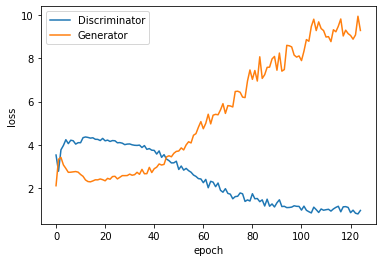

In [ ]:
#loss可視化
import matplotlib.pyplot as plt
plt.xlabel("epoch")
plt.ylabel("loss")
print(epoch_d_loss_list)

plt.plot(epoch_d_loss_list, label="Discriminator")
plt.plot(epoch_g_loss_list, label="Generator")
plt.legend()
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


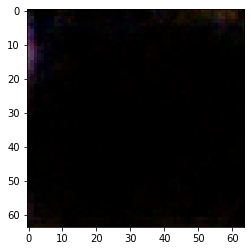

In [ ]:
#可視化
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

batch_size = 100
z_dim = 20

torch.manual_seed(seed_num)
fixed_z = torch.randn(batch_size, z_dim, 1, 1)
fixed_z = fixed_z.view(fixed_z.size(0), fixed_z.size(1), fixed_z.size(2), fixed_z.size(3))


#画像生成
G_update.eval()
fake_images = G_update(fixed_z.to(device))

#fake_images[0]
plt.imshow(fake_images[3].cpu().detach().numpy().transpose(1,2,0))
plt.show()

In [ ]:
print(fake_images.size())

torch.Size([10, 3, 64, 64])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


生成画像


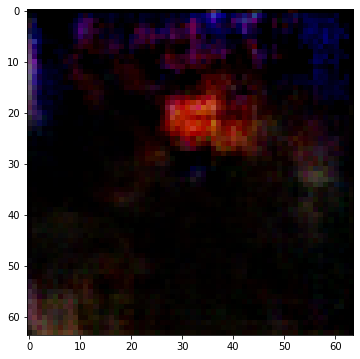

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


生成画像


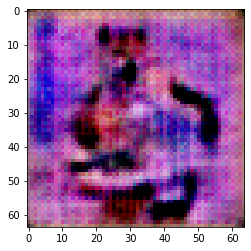

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


生成画像


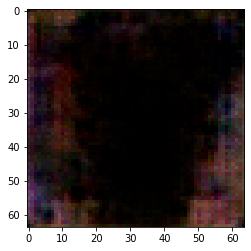

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


生成画像


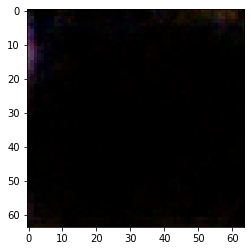

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


生成画像


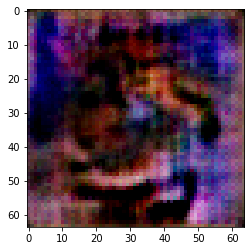

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


生成画像


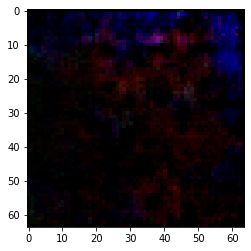

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


生成画像


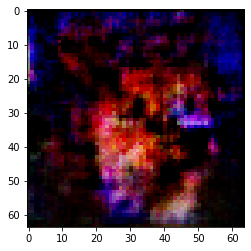

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


生成画像


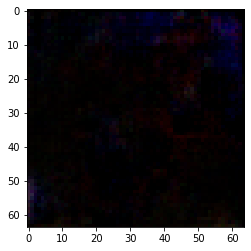

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


生成画像


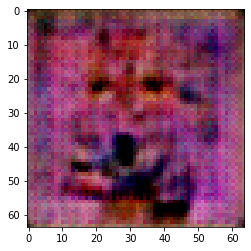

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


生成画像


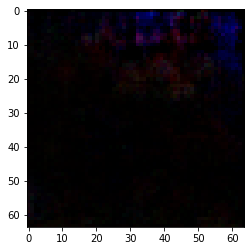

In [ ]:
#訓練データ
batch_iterator = iter(train_dataloader)
images = next(batch_iterator)

#出力
fig = plt.figure(figsize=(15,6))

for i in range(0,10):

    #plt.subplot(2,10,i+1)
    # plt.imshow(images[i].cpu().detach().numpy().transpose(1,2,0))
    # print("教師画像")
    # plt.show()

    #plt.subplot(2,10,5+i+1)
    plt.imshow(fake_images[i].cpu().detach().numpy().transpose(1,2,0))
    print("生成画像")
    plt.show()